Mean of Etf col:  121.152960012
Stanadard Deviation of ETF col:  12.563503845944297


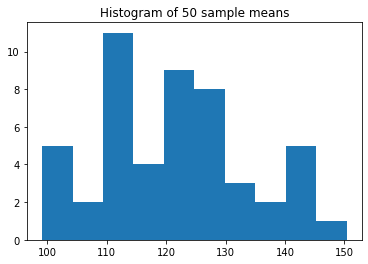

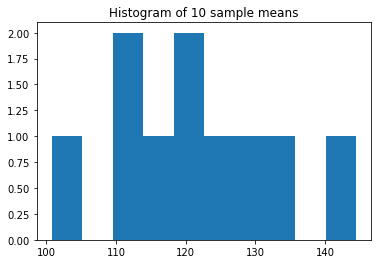

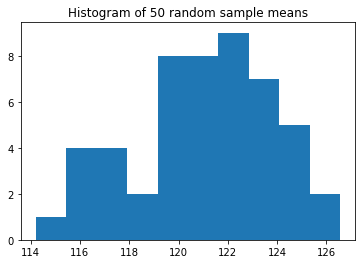

The confidence interval for one selected sample mean is [115.77785940715815, 128.04933999284185]


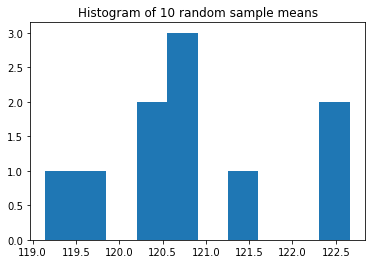

The confidence interval for one selected sample mean is [119.52784410074933, 124.29935529925065]
t-test for one of 50 random samples


t-test for one of 10 random samples


z-test for one of 50 random samples
pval is 0.10342809777732154


z-test for one of ten random samples
pval is 0.8721458475949542


Chi-Square test for one of 50 random samples
pval is 0.2122287831957253


In [39]:
import pandas as pd
from statistics import mean, stdev
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats



df = pd.read_excel (r'C:\Users\arora\Arnav\Stevens\MA541\Data.xlsx', sheet_name='Sheet1')
#print (df)

#mean=df.mean()
#stdv=df.std()
#print("Mean of Etf col: ", mean[0])
#print("Stanadard Deviation of ETF col: ", stdv[0])

#print(df['Close_ETF'])
#seq50_means=[]

####DATA FOR 50 SEQUENTIAL GROUPS####     
data=df['Close_ETF'].to_numpy() 

mean=np.mean(data)
stdv=np.std(data)
print("Mean of Etf col: ", mean)
print("Stanadard Deviation of ETF col: ", stdv)


split50=np.array_split(data,50)
mean50=np.zeros(50)
std50=np.zeros(50)
for i in range(50):
    mean50[i]=np.mean(split50[i])
    std50[i]=np.std(split50[i])

%matplotlib inline
plt.hist(mean50, bins = 10)
plt.title("Histogram of 50 sample means")
plt.show()

####DATA FOR 10 SEQUENTIAL GROUPS####

split10=np.array_split(data,10)
mean10=np.zeros(10)
std10=np.zeros(10)
for i in range(10):
    mean10[i]=np.mean(split10[i])
    std10[i]=np.std(split10[i])

%matplotlib inline
plt.hist(mean10, bins = 10)
plt.title("Histogram of 10 sample means")
plt.show()

####DATA FOR 50 RANDOM GROUPS(WITH REPLACEMENT)####

mean50rand=np.zeros(50)
std50rand=np.zeros(50)
conf_mean1=0
conf_std1=0
sample_data1=np.zeros(20)

for i in range(50):
    samplelist = random.choices(data, k=20)
    mean50rand[i]=np.mean(samplelist)
    std50rand[i]=np.std(samplelist)
    if i==25:
        conf_mean1=np.mean(samplelist)
        conf_std1=np.std(samplelist)
        sample_data1=samplelist
    #print(samplelist3)
#print(mean50rand)
#print(std50rand)
%matplotlib inline
plt.hist(mean50rand, bins = 10)
plt.title("Histogram of 50 random sample means")
plt.show()

interval=1.96*conf_std1/np.sqrt(20)
print("The confidence interval for one selected sample mean is", [conf_mean-interval,conf_mean+interval])

stats.ttest_1samp(a=sample_data1, popmean=100)

####DATA FOR 10 RANDOM GROUPS(WITH REPLACEMENT)####

mean10rand=np.zeros(10)
std10rand=np.zeros(10)
conf_mean2=0
conf_std2=0
sample_data2=np.zeros(100)

for i in range(10):
    samplelist = random.choices(data, k=100)
    mean10rand[i]=np.mean(samplelist)
    std10rand[i]=np.std(samplelist)
    if i==5:
        conf_mean2=np.mean(samplelist)
        conf_std2=np.std(samplelist)
        sample_data2=samplelist
    #print(samplelist3)
#print(mean50rand)
#print(std50rand)

%matplotlib inline
plt.hist(mean10rand, bins = 10)
plt.title("Histogram of 10 random sample means")
plt.show()

interval=1.96*conf_std/np.sqrt(100)
print("The confidence interval for one selected sample mean is", [conf_mean-interval,conf_mean+interval])



######HYPOTHESIS TESTING BELOW######


##t-test for 1,2 of part 6####
##uncomment all but one of the pairs to see result##

print("t-test for one of 50 random samples")
stats.ttest_1samp(a=sample_data1, popmean=100)
print("\n")

print("t-test for one of 10 random samples")
stats.ttest_1samp(a=sample_data2, popmean=100)
print("\n")

##z-test for 1,2 for part 6##
print("z-test for one of 50 random samples")
x_bar = conf_mean1 # sample mean 
n = 20 # number of students
sigma =  stdv# sd of population
mu = mean # Population mean 

z = (x_bar - mu)/(sigma/np.sqrt(n))
pval = 1 - stats.norm.cdf(z)

print("pval is", pval)
print("\n")
print("z-test for one of ten random samples")

x_bar = conf_mean2 # sample mean 
n = 100 # number of students
sigma =  stdv # sd of population
mu = mean # Population mean 

z = (x_bar - mu)/(sigma/np.sqrt(n))
pval = 1 - stats.norm.cdf(z)

print("pval is", pval)
print("\n")
##chi2 test for 3,4 of part 6 ##

n=20
s=conf_std1
chi=(n-1)*(s**2)/(stdv**2)
#print(chi)
p_val=stats.distributions.chi2.sf(chi, n-1)
print("Chi-Square test for one of 50 random samples")
print("pval is", p_val)



